In [12]:
import pandas as pd
import numpy as np

In [3]:
ds = pd.read_csv("Churn_Modelling.csv")
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
ds.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [6]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
def categorical_encoding( feature ):
    global ds
    values = ds[ feature ].unique().tolist()
    for i , val in enumerate( values ):
        ds.loc[ ds[ feature ] == val , feature ] = i
    ds[feature] = ds[feature].astype( 'int32' )

categorical_encoding("Geography")
categorical_encoding("Gender")

In [8]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
def min_max_normalize( name ):
    global ds
    ds[name] = ds[name].astype( 'float32' )
    ds[ name ] = (ds[ name ] - ds[ name ].min()) / ( ds[ name ].max() - ds[ name ].min() )

cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "EstimatedSalary"]
for col in cols:
    min_max_normalize(col)

In [13]:
X = ds.drop(["Exited"], axis=1).to_numpy().astype(np.float32)
y = ds["Exited"].to_numpy()

print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 10)
(7000,)
(3000, 10)
(3000,)


In [18]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

c:\Users\equip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [20]:
from sklearn.metrics import accuracy_score

# https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.accuracy_score.html
pred_y = clf.predict(X_test)
print(f"Accuracy is {accuracy_score(y_test, pred_y)}")

Accuracy is 0.848


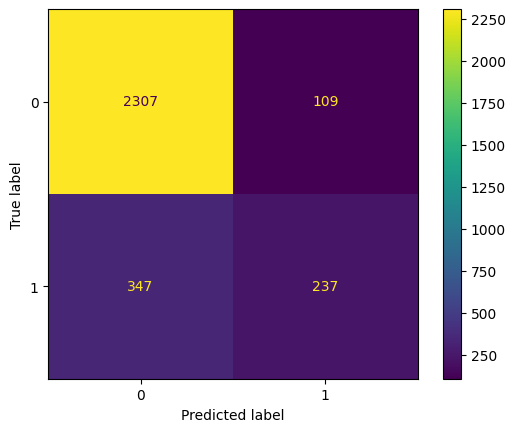

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2416
           1       0.68      0.41      0.51       584

    accuracy                           0.85      3000
   macro avg       0.78      0.68      0.71      3000
weighted avg       0.83      0.85      0.83      3000

